# Chapter 5: Linear Regression 

## Author: Audrey Marthin

### Sources: 
- https://pandas.pydata.org/docs/ 
- Professor Wirfs-Brock's Class Code Demo
- Audrey's projects

Date: Monday, December 11

#### *Personal Data Present

We'll be using my personal data from my Zepp watch that I wear almost daily. We'll be specifically using the activity and heart data from December 1, 2022 to December 1, 2023.

### Part 1: Data Processing

In [121]:
# Import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# statsmodel package for linear regression
from statsmodels.formula.api import ols

#### Data Processing First

In [122]:
# Import CSV files as dataframes
df_activity = pd.read_csv("personal_zepp_watch_data/ACTIVITY/ACTIVITY_1702335329430.csv")
df_heart = pd.read_csv("personal_zepp_watch_data/HEARTRATE_AUTO/HEARTRATE_AUTO_1702335330955.csv")
df_heart

,date,time,heartRate
0,2023-01-16,01:16,66
1,2023-01-16,01:17,73
2,2023-01-16,01:18,67
3,2023-01-16,01:19,68
4,2023-01-16,01:20,63
...,...,...,...
268525,2023-12-01,23:55,59
268526,2023-12-01,23:56,55
268527,2023-12-01,23:57,64
268528,2023-12-01,23:58,66


In [123]:
# Get average heart rate data per day instead of per second
df_heart_average = df_heart.groupby("date")["heartRate"].mean().reset_index()
df_heart_average

,date,heartRate
0,2023-01-16,75.675612
1,2023-01-17,74.267857
2,2023-01-18,74.612490
3,2023-01-19,76.855465
4,2023-01-20,76.777170
...,...,...
217,2023-11-27,68.709538
218,2023-11-28,69.069956
219,2023-11-29,66.856305
220,2023-11-30,66.346183


In [124]:
# Merge data on the date
df_activity_heart = df_activity.merge(df_heart_average, how="inner", on="date")
df_activity_heart

,date,steps,distance,runDistance,calories,heartRate
0,2023-01-16,7655,5168,1492,164,75.675612
1,2023-01-17,6892,4560,388,131,74.267857
2,2023-01-18,5345,3428,294,100,74.612490
3,2023-01-19,7374,5101,600,553,76.855465
4,2023-01-20,6547,4107,596,494,76.777170
...,...,...,...,...,...,...
217,2023-11-27,4982,3232,358,107,68.709538
218,2023-11-28,4735,3056,738,108,69.069956
219,2023-11-29,4466,3000,222,99,66.856305
220,2023-11-30,5027,3251,1035,114,66.346183


### Part 2: Linear Regression

In [125]:
# Select some columns and use .describe() to show the summary statistics

df_activity_heart[["steps", "calories", "heartRate"]].describe()

,steps,calories,heartRate
count,222.000000,222.000000,222.000000
mean,6419.644144,215.423423,73.791025
std,5151.848309,150.381088,5.155392
min,0.000000,0.000000,58.341102
25%,3330.750000,89.000000,71.022357
50%,5102.000000,183.000000,72.853190
75%,7557.500000,329.750000,76.235088
max,26464.000000,555.000000,91.012438


Note Observations
- Steps and Calories have a minimum value of 0 which is probably when I wasn't wearing the watch or I was being a couch potato the whole day :D 
- Calories are only counted for activity, not for basal metabolic rate calories, which explains why the min value is 0
- As steps increase, calories increase that is the clearer relationship.
- Technically, someone with more activity usually have lower resting heart rate.


In [126]:
# Find correlation between variables
df_activity_heart[["steps", "calories", "heartRate"]].corr()

,steps,calories,heartRate
steps,1.000000,0.701849,0.419284
calories,0.701849,1.000000,0.239725
heartRate,0.419284,0.239725,1.000000


Pretty high positive corelation for steps and calories, with moderate to high positive correlation for steps to heart rate, and moderate to low positive corelation for calories to heart rate.

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


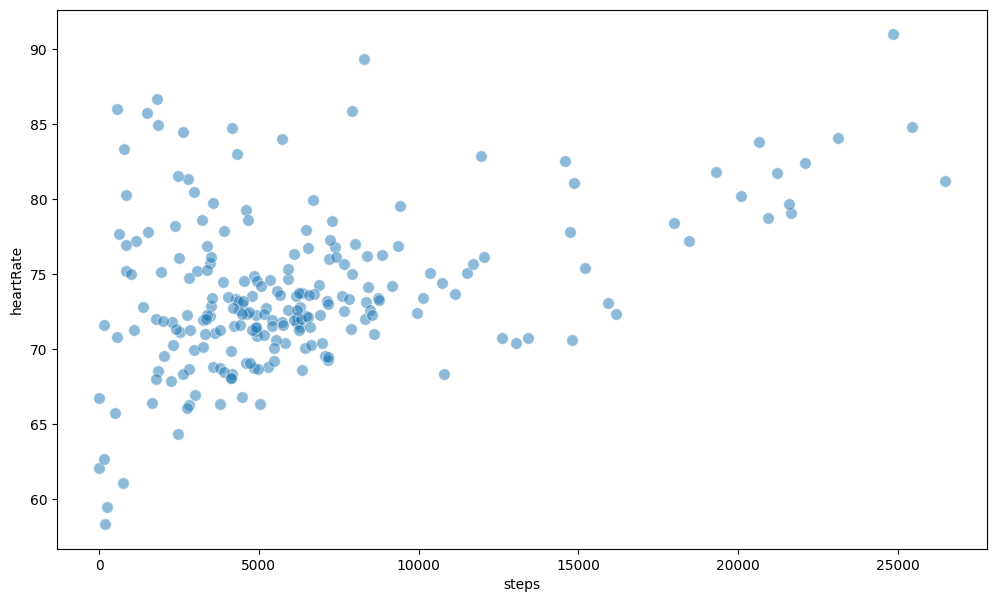

In [127]:
# Visualize relationship between steps and heart rate 
# Do so by making a scatterplot with seaborn and matplotlib
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_activity_heart, x="steps", y="heartRate", s=70, alpha=0.5)
plt.show()

There's a lot of overlapping points on the lower end of steps, which makes sense as I don't walk 25000 steps everyday. 

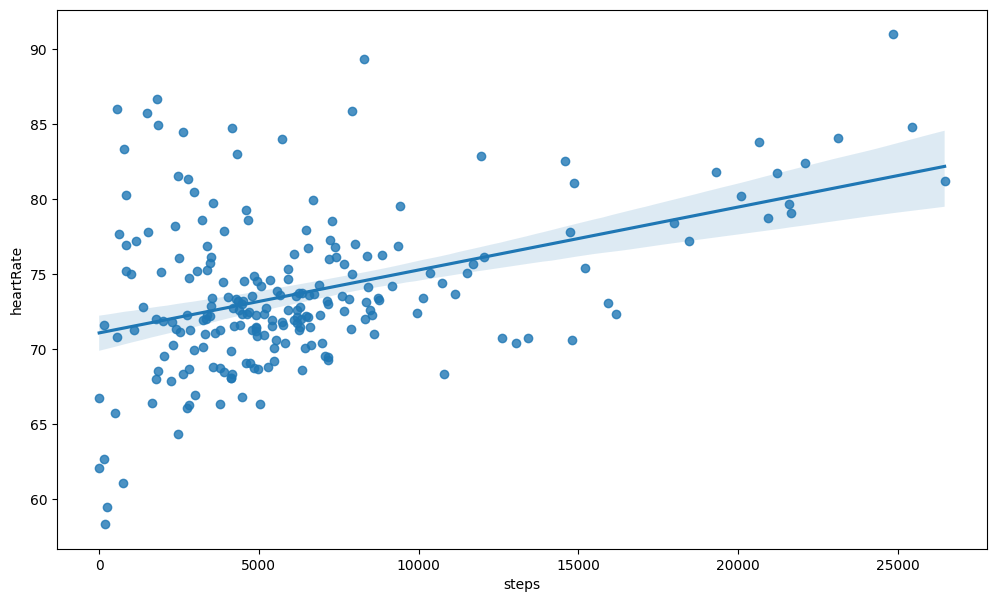

In [128]:
# Make a regplot which gives line of best fit
plt.figure(figsize=(12, 7))
sns.regplot(data=df_activity_heart, x="steps", y="heartRate")
plt.show()

After this, we will do linear regression, which will also draw line of best fit with the coefficients to understand data.

In [129]:
# First create and fit the model
# Make sure to put in correct order!
model_activity_heart = ols("heartRate ~ steps", data=df_activity_heart).fit()

# Then print out the model's coefficients
print(model_activity_heart.params)

Intercept    71.097519
steps         0.000420
dtype: float64


This result translates to an equation:

(evaluation) score = 71.097519 + 0.000420 * steps

The positive slope indicates a positive correlation of the 2 variables.

We can also look at "residuals", which is how close/far was the model to actual observed value for each data in our dataset.

In [130]:
# We can get the residuals and examine them for all the data points 
print(model_activity_heart.resid)

0      1.366265
1      0.278645
2      1.272356
3      2.664019
4      2.932710
         ...   
217   -4.478292
218   -4.014239
219   -6.115025
220   -6.860527
221   -4.141682
Length: 222, dtype: float64


Let's do another one with steps vs calories this time!

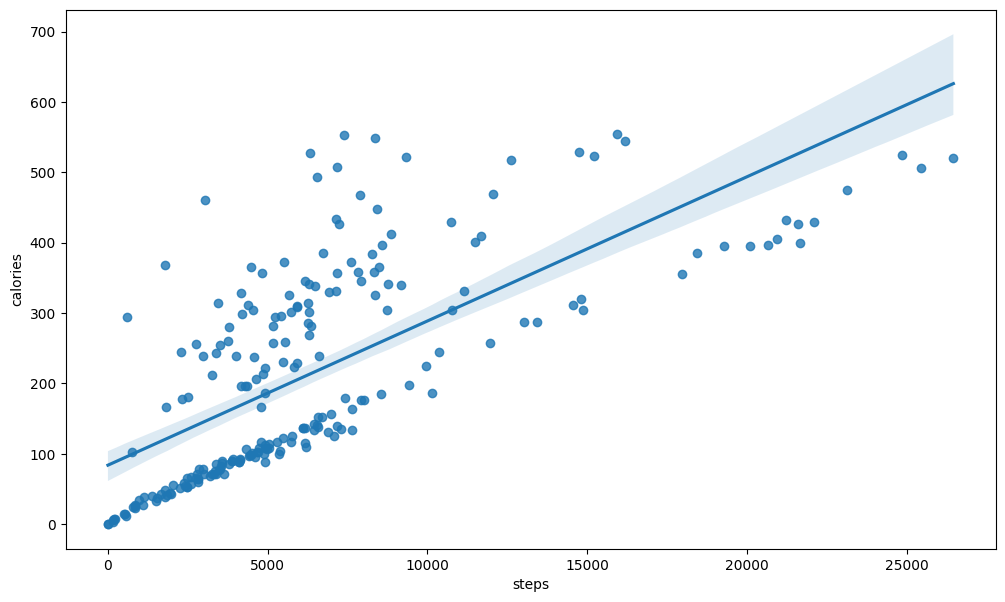

In [131]:
# Make a regplot which gives line of best fit
plt.figure(figsize=(12, 7))
sns.regplot(data=df_activity_heart, x="steps", y="calories")
plt.show()

This looks slightly more linear and clustered along the line, which makes sense considering the high positive correlation we found earlier as well.

In [132]:
# Create and fit the model
# Make sure to put in correct order!
model_activity_calories = ols("calories ~ steps", data=df_activity_heart).fit()

# Then print out the model's coefficients
print(model_activity_calories.params)

Intercept    83.905480
steps         0.020487
dtype: float64


In [149]:
# We can get the residuals and examine them for all the data points 
print(model_activity_calories.resid)

0      -76.731908
1      -94.100482
2      -93.407407
3      318.024882
4      275.967463
          ...    
217    -78.970700
218    -72.910462
219    -76.399513
220    -72.892606
221    -73.050204
Length: 222, dtype: float64


#### Now, we've learned some more advanced application in the data science world! And that ends the cookbook recipes! (Or at least for now.)